# The MNIST (Modified National Institute of Standards and Technology) dataset 

The purpose of this lesson is to provide a deeper understanding of how image recognition works using the MNIST dataset.

In [1]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [2]:
import os
import random
from IPython.display import display
from PIL import Image

from functools import partial

# Download MNIST Sample

In [3]:
print(f"The MNIST dataset can be downloaded from here: {URLs.MNIST_SAMPLE}")
path = untar_data(URLs.MNIST_SAMPLE)
print(f"Unpacked here: {path}")

The MNIST dataset can be downloaded from here: https://s3.amazonaws.com/fast-ai-sample/mnist_sample.tgz
Unpacked here: /Users/dima/.fastai/data/mnist_sample


# Inspect Data

In [4]:
!tree -L 2 /Users/dima/.fastai/data/mnist_sample

/Users/dima/.fastai/data/mnist_sample
├── labels.csv
├── train
│   ├── 3
│   └── 7
└── valid
    ├── 3
    └── 7

7 directories, 1 file


In [5]:
def show_n_images(folder_path, n):    
    # Get all image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
    
    # Select any 3 images randomly
    selected_images = random.sample(image_files, n)
    
    # Display the selected images
    for img_file in selected_images:
        img_path = os.path.join(folder_path, img_file)
        img = Image.open(img_path)
        display(img)

show_three_images = partial(show_n_images, n=3)

In [6]:
show_three_images(path / "train" / "3")

In [7]:
show_three_images(path / "train" / "7")

In [8]:
img3 = Image.open(path / "train" / "3" / "10.png")
img3

In [9]:
print(array(img3))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238  70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254 141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 254 254 254  34   

In [10]:
array?

Docstring:
array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0,
      like=None)

Create an array.

Parameters
----------
object : array_like
    An array, any object exposing the array interface, an object whose
    ``__array__`` method returns an array, or any (nested) sequence.
    If object is a scalar, a 0-dimensional array containing object is
    returned.
dtype : data-type, optional
    The desired data-type for the array. If not given, NumPy will try to use
    a default ``dtype`` that can represent the values (by applying promotion
    rules when necessary.)
copy : bool, optional
    If ``True`` (default), then the array data is copied. If ``None``,
    a copy will only be made if ``__array__`` returns a copy, if obj is
    a nested sequence, or if a copy is needed to satisfy any of the other
    requirements (``dtype``, ``order``, etc.). Note that any copy of
    the data is shallow, i.e., for arrays with object dtype, the new
    array will point to the 

---

The same image, but as **Tensor**.

In [11]:
im3_t = tensor(img3)
df = pd.DataFrame(im3_t)
df.style.set_properties(**{'font-size':'8pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,42,118,219,166,118,118,6,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,103,242,254,254,254,254,254,66,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,18,232,254,254,254,254,254,238,70,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,104,244,254,224,254,254,254,141,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,207,254,210,254,254,254,34,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,84,206,254,254,254,254,41,0,0,0,0,0,0,0,0,0


In [12]:
tensor?

Signature:
tensor(
    x,
    *rest,
    dtype=None,
    device=None,
    requires_grad=False,
    pin_memory=False,
)
Docstring: Like `torch.as_tensor`, but handle lists too, and can pass multiple vector elements directly.
File:      ~/venv/lib/python3.11/site-packages/fastai/torch_core.py
Type:      function

# Try Pixel Similarity

Before we create a more advanced model, let's start with something quick and simple. We'll calculate the average of all pixels for a given number.

In [13]:
def avg_mask(number="3"):
    folder_path = path / "train" / number
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
    return [tensor(Image.open(folder_path / o)) for o in image_files]
    

In [14]:
three_tensors = avg_mask("3")

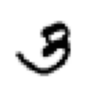

In [15]:
show_image(three_tensors[112]);

In [16]:
torch.stack?

Docstring:
stack(tensors, dim=0, *, out=None) -> Tensor

Concatenates a sequence of tensors along a new dimension.

All tensors need to be of the same size.

.. seealso::

    :func:`torch.cat` concatenates the given sequence along an existing dimension.

Arguments:
    tensors (sequence of Tensors): sequence of tensors to concatenate
    dim (int, optional): dimension to insert. Has to be between 0 and the number
        of dimensions of concatenated tensors (inclusive). Default: 0

Keyword args:
    out (Tensor, optional): the output tensor.

Example::

    >>> x = torch.randn(2, 3)
    >>> x
    tensor([[ 0.3367,  0.1288,  0.2345],
            [ 0.2303, -1.1229, -0.1863]])
    >>> torch.stack((x, x)) # same as torch.stack((x, x), dim=0)
    tensor([[[ 0.3367,  0.1288,  0.2345],
             [ 0.2303, -1.1229, -0.1863]],

            [[ 0.3367,  0.1288,  0.2345],
             [ 0.2303, -1.1229, -0.1863]]])
    >>> torch.stack((x, x)).size()
    torch.Size([2, 2, 3])
    >>> torch.sta

In [17]:
# Also cast to float and normilize to be between 0 and 1
threes = torch.stack(three_tensors).float()/255

In [18]:
print(f"Shape: {threes.shape}, rank: {threes.ndim}")

Shape: torch.Size([6131, 28, 28]), rank: 3


The rank of a tensor refers to the number of dimensions (or axes) it has. 

| Tensor Type | Rank | Example Shape      | Example Description         |
|-------------|------|--------------------|-----------------------------|
| Scalar      | 0    | `()`               | A single number             |
| Vector      | 1    | `(3,)`             | A 1D array                  |
| Matrix      | 2    | `(3, 4)`           | A 2D array (rows × columns) |
| 3D Tensor   | 3    | `(2, 3, 4)`        | 3D array                    |
| n-D Tensor  | n    | `(d1, d2, ..., dn)`| n-dimensional array         |


<Axes: >

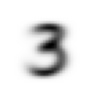

In [19]:
# Take a mean along dimension zero:
mean3 = threes.mean(0)
show_image(mean3)

In [20]:
seven_tensors = avg_mask("7")
sevens = torch.stack(seven_tensors).float()/255
mean7 = sevens.mean(0)

<Axes: >

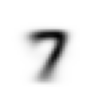

In [21]:
show_image(mean7)

In [22]:
# PyTorch already provides root mean squared error (RMSE) or L2 norm.
F.mse_loss(threes[112].float(), mean3), F.mse_loss(threes[112].float(), mean7) # ((a_3 - mean7)**2).mean().sqrt()

(tensor(0.0670), tensor(0.1046))

# Stochastic Gradient Descent

PyTorch can automatically compute the derivative of almost any function. It does this by tagging variables so it can track how to calculate gradients during subsequent operations. In deep learning, "gradients" typically refer to the value of a function's derivative at a specific input.

In [23]:
def f(x): return x**2

In [24]:
xt = tensor(3.).requires_grad_()

In [25]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

We can now ask PyTorch to calculate gradient for us:

In [26]:
yt.backward()  # Or simply - calculate_grad!

In [27]:
xt.grad

tensor(6.)

## Automatic Differentiation

In [28]:
a = tensor([2., 3.]).requires_grad_()
b = tensor([6., 4.]).requires_grad_()

In [29]:
Q = 3*a**3 - b**2

In [30]:
Q

tensor([-12.,  65.], grad_fn=<SubBackward0>)

In [31]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

When we call .backward() on Q, autograd calculates gradients and stores them in the respective tensors’ .grad attribute.

In [32]:
print(a.grad)
print(b.grad)

tensor([36., 81.])
tensor([-12.,  -8.])


## A Tensor with rank > 0

Behind the scenes PyTorch has an **autograd** (automatic differentiation) engine. It builds a computation graph dynamically as you perform operations on tensors with `requires_grad=True`.

In [33]:
# We can repeat the same operation for multiple values:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [34]:
# And we'll add sum to our function so it can take a vector (i.e., a rank-1 tensor), and return a scalar (i.e., a rank-0 tensor):
def f(x): return (x**2).sum() 

yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [35]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

The gradients only tell us the slope of our function, they don't actually tell us exactly how far to adjust the parameters. But it gives us some idea of how far; if the slope is very large, then that may suggest that we have more adjustments to do, whereas if the slope is very small, that may suggest that we are close to the optimal value.

## E2E Example: Linear Function

The model is very simple: $y_{pred} = x_1*w_1 + x_2*w_2$

In [36]:
def model(x1, x2, w1, w2):
    return x1*w1 + x2*w2

In [37]:
# Let's say that my inputs, also known as training data, x1 = 2, x2 = 1
data = torch.tensor([2., 1.])
# let's say that the gound y = 4
y_true = torch.tensor([4.])
# Let's initialize the values of w1 and w2 by randomly setting both to 1. Since these are the parameters we want to optimize, we'll also track their gradients.
ws = torch.tensor([1., 1.]).requires_grad_()

In [38]:
# Now we are ready to run the prediction:
y_pred = model(*data, *ws)

In [39]:
print(y_pred)

tensor(3., grad_fn=<AddBackward0>)


In [40]:
# We need to define a loss function.
def mse(preds, targets):
    return (preds-targets)**2

In [41]:
loss = mse(y_pred, y_true)

In [42]:
print(loss)

tensor([1.], grad_fn=<PowBackward0>)


In [43]:
# Now we can extract gradients, isntead of calculating them manually!
loss.backward()
print(ws.grad)

tensor([-4., -2.])


In [44]:
lr = 1e-2
ws.data -= lr * ws.grad.data

## E2E Example: Non-Linear Function

In [45]:
# A toy example of speed over time.
time = torch.arange(0, 20).float()
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1

In [46]:
print(speed)

tensor([74.4682, 59.6494, 45.8897, 26.3709, 21.4131, 19.4225, 12.5899, 10.7294,  3.7551, -0.8724, -0.2926,  3.4120,  4.9926, 10.3128, 15.4328, 26.2671, 31.7583, 42.0004, 57.5977, 66.8227])


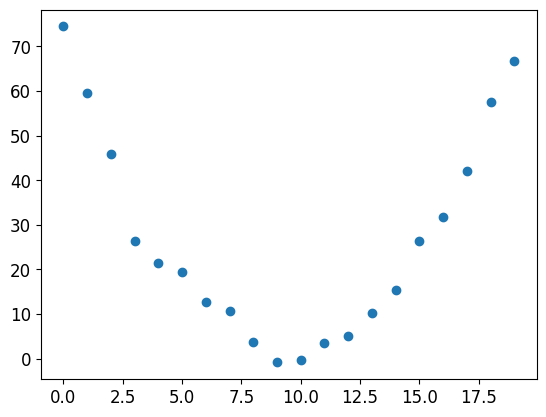

In [47]:
plt.scatter(time,speed);

In [48]:
# Let's make a "wild" guess and try to approximate data with quadratic function.
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

If we can solve this problem for the three parameters of a quadratic function, we'll be able to apply the same approach for other, more complex functions with more parameters—such as a neural net.

We need to define first what we mean by "best." We define this precisely by choosing a loss function, which will return a value based on a prediction and a target, where lower values of the function correspond to "better" predictions.

In [49]:
# The loss function quantifies how well your parameters (a, b, and c) currently fit your data
def mse(preds, targets):
    return ((preds-targets)**2).mean()

In [50]:
# Step 1: Init a, b, and c to random variable and track gradients.
params = torch.randn(3).requires_grad_()

In [51]:
# Step 2: Calculate the predictions
preds = f(time, params)
print(preds)

tensor([ 1.3525e+00, -1.6391e-01, -3.2121e+00, -7.7919e+00, -1.3903e+01, -2.1547e+01, -3.0721e+01, -4.1428e+01, -5.3666e+01, -6.7436e+01, -8.2738e+01, -9.9571e+01, -1.1794e+02, -1.3783e+02,
        -1.5926e+02, -1.8222e+02, -2.0671e+02, -2.3274e+02, -2.6029e+02, -2.8938e+02], grad_fn=<AddBackward0>)


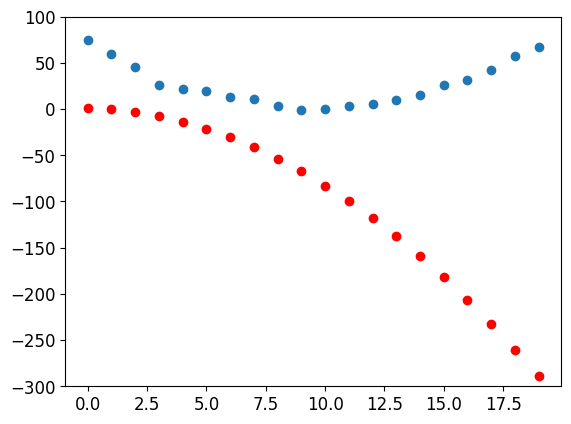

In [52]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

show_preds(preds)

In [53]:
# Step 3: Calculate the loss. We will be looking for improving gradients for losses, not for the original function!
# Original function is important only for the forward pass when predict.
loss = mse(preds, speed)
loss

tensor(25823.8086, grad_fn=<MeanBackward0>)

In [54]:
# Step 4: Calculate the gradients
loss.backward()

In [55]:
params.grad  # Gradient vector of a loss function.

tensor([-53195.8594,  -3419.7146,   -253.8908])

PyTorch computes the partial derivatives of loss with respect to each parameter (a, b, and c). Each parameter tensor's .grad attribute contains the derivative evaluated at the current parameter values.

The gradient values indicate the direction and magnitude by which each parameter (a, b, and c) should change to minimize the loss during the next optimization step.

In [56]:
# Step 5: Step the weights.
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

Understanding this bit depends on remembering recent history. To calculate the gradients we call backward on the loss. But this loss was itself calculated by mse, which in turn took preds as an input, which was calculated using f taking as an input params, which was the object on which we originally called requires_grad_—which is the original call that now allows us to call backward on loss. This chain of function calls represents the mathematical composition of functions, which enables PyTorch to use calculus's chain rule under the hood to calculate these gradients.

In [57]:
preds = f(time,params)
mse(preds, speed)

tensor(5435.5371, grad_fn=<MeanBackward0>)

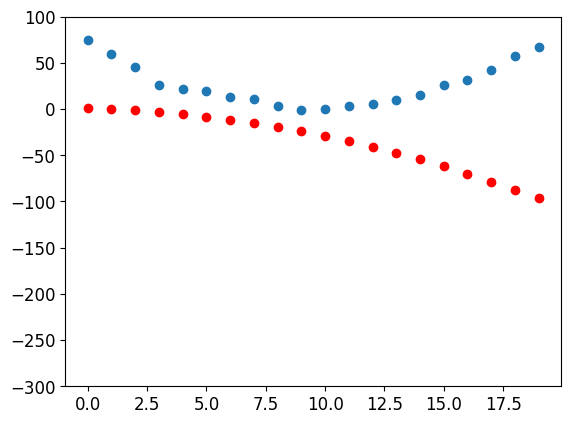

In [58]:
show_preds(preds)

In [60]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    print(loss.item())
    return preds

In [61]:
# Step 6: just repeat the process multiple times!
for i in range(10): apply_step(params)

5435.537109375
1577.449462890625
847.3779296875
709.2225952148438
683.0758056640625
678.1244506835938
677.1838989257812
677.0023193359375
676.9644775390625
676.9537353515625


Looking only at these loss numbers disguises the fact that each iteration represents an entirely different quadratic function being tried, on the way to finding the best possible quadratic function.

676.9481201171875
676.9434814453125
676.9390869140625
676.9346923828125


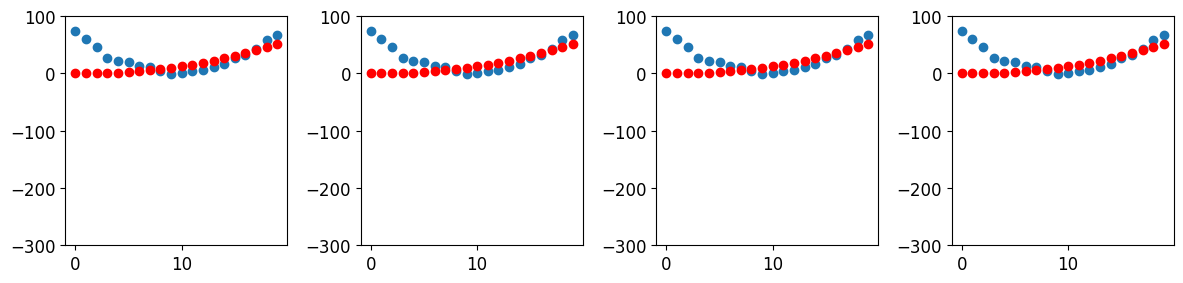

In [62]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [63]:
params

tensor([ 0.1756, -0.6893,  1.3597], requires_grad=True)

## The MNIST Loss Function

In [64]:
print(threes.shape, sevens.shape)

torch.Size([6131, 28, 28]) torch.Size([6265, 28, 28])


In [65]:
threes_sevents = torch.cat([threes, sevens]) # simple concatination
print(threes_sevents.shape)

torch.Size([12396, 28, 28])


In [66]:
# view's -1 is a special parameter to view that means "make this axis as big as necessary to fit all the data":
train_x = threes_sevents.view(-1, 28*28)
print(train_x.shape)

torch.Size([12396, 784])


In [67]:
# Add labels.
train_y_squeeze = tensor( [1]*len(threes) + [0]*len(sevens) )
print(train_y_squeeze)

tensor([1, 1, 1,  ..., 0, 0, 0])


In [68]:
train_y = train_y_squeeze.unsqueeze(1)

In [69]:
train_y

tensor([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]])

In [76]:
# PyTorch wants (X,Y) pairs
dset = list(zip(train_x,train_y))
x,y = dset[0]
print(f"A single example: x.shape = {x.shape}, y.shape = {y.shape}")

A single example: x.shape = torch.Size([784]), y.shape = torch.Size([1])


In [77]:
def init_params(size, std=1.0): 
    return (torch.randn(size)*std).requires_grad_()

In [78]:
# As always, we initiate parameters to some random numbers.
weights = init_params((28*28,1))
bias = init_params(1)

In [79]:
weights.shape, bias.shape

(torch.Size([784, 1]), torch.Size([1]))

In [80]:
# Prediction for a single image:
(train_x[0]*weights.T).sum() + bias

tensor([8.4130], grad_fn=<AddBackward0>)

In [81]:
train_x.shape, weights.shape

(torch.Size([12396, 784]), torch.Size([784, 1]))

In [82]:
# Predictions for everything, "@" is for matmul:
preds = train_x @ weights + bias
print(preds) # The first elements is the same as before.

tensor([[ 8.4130],
        [ 7.7504],
        [13.5487],
        ...,
        [24.0699],
        [20.7974],
        [19.3607]], grad_fn=<AddBackward0>)


In [83]:
corrects = (preds>0.0).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])

In [84]:
corrects.float().mean().item()

0.4912068545818329

In [85]:
# Just to check the idea, let's change one of 784 params:
with torch.no_grad():
    weights[0] *= 1.0001

In [86]:
preds = train_x @ weights + bias
((preds>0.0).float() == train_y).float().mean().item()

0.4912068545818329

As we've seen, we need gradients in order to improve our model using SGD, and in order to calculate gradients we need some loss function that represents how good our model is. That is because the gradients are a measure of how that loss function changes with small tweaks to the weights.

Unfortunately, we have a significant technical problem here. The gradient of a function is its slope, or its steepness, which can be defined as rise over run—that is, how much the value of the function goes up or down, divided by how much we changed the input. We can write this in mathematically as: 

$$(y_{new} - y_{old}) / (x_{new} - x_{old})$$ 

This gives us a good approximation of the gradient when $x_{new}$ is very similar to $x_{old}$, meaning that their difference is very small. But accuracy only changes at all when a prediction changes from a 3 to a 7, or vice versa. The problem is that a small change in weights from $x_{old}$ to $x_{new}$ isn't likely to cause any prediction to change, so $(y_{new} - y_{old})$ will almost always be 0. In other words, the gradient is 0 almost everywhere.

A very small change in the value of a weight will often not actually change the accuracy at all. This means it is not useful to use accuracy as a loss function. If we do, most of the time our gradients will actually be 0, and the model will not be able to learn from that number.

Instead, we need a loss function which, when our weights result in slightly better predictions, gives us a slightly better loss. So what does a "slightly better prediction" look like, exactly? Well, in this case, it means that if the correct answer is a 3 the score is a little higher, or if the correct answer is a 7 the score is a little lower.

So, for instance, suppose we had three images which we knew were a 3, a 7, and a 3. And suppose our model predicted with high confidence (0.9) that the first was a 3, with slight confidence (0.4) that the second was a 7, and with fair confidence (0.2), but incorrectly, that the last was a 7. This would mean our loss function would receive these values as its inputs:

In [87]:
# Let's learn "where" function: In plain English, this function will measure how distant each prediction is from 1 if it should be 1, 
# and how distant it is from 0 if it should be 0, and then it will take the mean of all those distances.
trgts  = tensor([1,0,1])
prds   = tensor([0.9, 0.4, 0.2])
torch.where(trgts == 1, 1 - prds, prds)
# In short, torch.where(cond, x, y) does an element‐by‐element choice: wherever cond is true, it returns the corresponding element from x; 
# otherwise, it returns the corresponding element from y.

tensor([0.1000, 0.4000, 0.8000])

In [88]:
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()
mnist_loss(prds,trgts)

tensor(0.4333)

In [89]:
# For instance, if we change our prediction for the one "false" target from 0.2 to 0.8 the loss will go down, indicating that this is a better prediction:
mnist_loss(tensor([0.9, 0.4, 0.8]),trgts)


tensor(0.2333)

One problem with mnist_loss as currently defined is that it assumes that predictions are always between 0 and 1. We need to ensure, then, that this is actually the case! As it happens, there is a function that does exactly that—let's take a look.



## Sigmoid

The **sigmoid** function always outputs a number between 0 and 1. It's defined as follows:

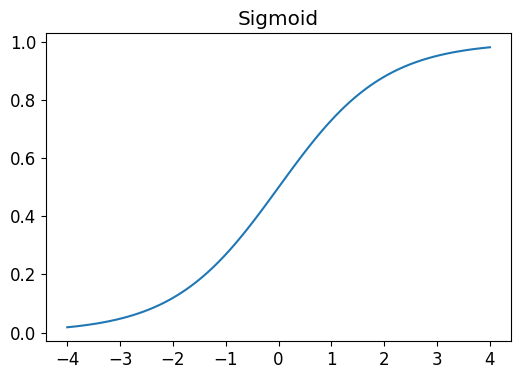

In [90]:
def sigmoid(x): return 1/(1+torch.exp(-x))
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

We can use this function to update our loss, since we want it always to be between 0 and 1.

In [91]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

# Putting It All Together

The data loader provides the independent variable $X$ and the dependent variable $Y$. For each epoch, we follow the same four steps:

1. Using an initial set of randomly selected parameters, make a prediction: `preds = model(X)`
2. Calculate the loss using the previously defined loss function: `loss = loss_func(preds, Y)`
3. Perform backpropagation with the computed loss: `loss.backward()`
4. Finally, update the weights: `parameters -= parameters.grad * lr`

In [96]:
# nn.Linear helps to create weights and a bias in a single command.
linear_model = nn.Linear(28*28, 1)  # 784 input features and 1 output feature
w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [113]:
train_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'train'/'3').ls()])
train_3_tens = train_3_tens.float()/255
train_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'train'/'7').ls()])
train_7_tens = train_7_tens.float()/255
train_3_tens.shape, train_7_tens.shape

train_x = torch.cat([train_3_tens, train_7_tens]).view(-1, 28*28)
train_y = tensor([1]*len(train_3_tens) + [0]*len(train_7_tens)).unsqueeze(1)
train_dset = list(zip(train_x, train_y))

dl = DataLoader(train_dset, batch_size=256)

In [114]:
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape, valid_7_tens.shape

valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

valid_dl = DataLoader(valid_dset, batch_size=256)

In [115]:
dls = DataLoaders(dl, valid_dl)

In [116]:
# batch accuracy is the metric we care about
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [117]:
# fastai provides the SGD
learn = Learner(dls, linear_model, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [118]:
learn.fit(10, lr=0.01)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.477829,0.374725,0.958783,00:00
1,0.353609,0.279014,0.929833,00:00
2,0.266190,0.216227,0.940628,00:00
3,0.209967,0.175207,0.955348,00:00
4,0.173177,0.149208,0.959274,00:00
5,0.148559,0.131845,0.961236,00:00
6,0.131515,0.119512,0.961727,00:00
7,0.119222,0.110291,0.962218,00:00
8,0.109983,0.103115,0.963690,00:00
9,0.102777,0.097352,0.964671,00:00


In [119]:
# The only issue with this model is that it is linear. Let's add nonlinearity.
# A simple example with two neurons and non-linear function in between:
def simple_net(xb): 
    res = xb@w1 + b1
    res = F.relu(res)
    res = res@w2 + b2
    return res

In [121]:
# That's it! All we have in simple_net is two linear classifiers with a relu function between them.
# w1 and w2 are weight tensors, and b1 and b2 are bias tensors; 
# that is, parameters that are initially randomly initialized, just like we did in the previous section:
w1 = init_params((28*28,60))
b1 = init_params(60)
w2 = init_params((60,1))
b2 = init_params(1)

The key point about this is that w1 has 60 output activations (which means that w2 must have 60 input activations, so they match). That means that the first layer can construct 60 different features, each representing some different mix of pixels. You can change that 60 to anything you like, to make the model more or less complex.

The basic idea is that by using more linear layers, we can have our model do more computation, and therefore model more complex functions. But there's no point just putting one linear layer directly after another one, because when we multiply things together and then add them up multiple times, that could be replaced by multiplying different things together and adding them up just once! That is to say, a series of any number of linear layers in a row can be replaced with a single linear layer with a different set of parameters.

But if we put a nonlinear function between them, such as relu, then this is no longer true. Now each linear layer is actually somewhat decoupled from the other ones, and can do its own useful work.

S: Mathematically, we say the composition of two linear functions is another linear function. So, we can stack as many linear classifiers as we want on top of each other, and without nonlinear functions between them, it will just be the same as one linear classifier.

Just like in the previous section, we can replace this code with something a bit simpler, by taking advantage of PyTorch:

In [127]:
simple_net = nn.Sequential(
    nn.Linear(28*28,60),  # No need to 
    nn.ReLU(),
    nn.Linear(60,1)
)

In [128]:
simple_net

Sequential(
  (0): Linear(in_features=784, out_features=60, bias=True)
  (1): ReLU()
  (2): Linear(in_features=60, out_features=1, bias=True)
)

In [129]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [130]:
learn.fit(30, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.284411,0.408988,0.506869,00:00
1,0.134209,0.209739,0.825810,00:00
2,0.075745,0.108075,0.919038,00:00
3,0.050998,0.074266,0.943081,00:00
4,0.039522,0.058737,0.960255,00:00
5,0.033554,0.050007,0.962709,00:00
6,0.030020,0.044473,0.965653,00:00
7,0.027649,0.040654,0.966143,00:00
8,0.025896,0.037833,0.968597,00:00
9,0.024514,0.035640,0.970069,00:00


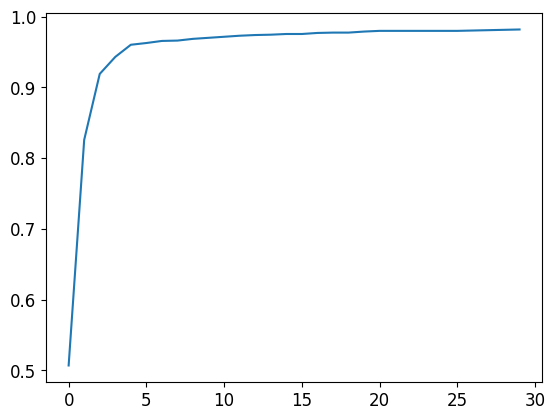

In [131]:
# The training process is recorded in learn.recorder, with the table of output stored in the values attribute, so we can plot the accuracy over training as:
plt.plot(L(learn.recorder.values).itemgot(2));

At this point we have something that is rather magical:

- A function that can solve any problem to any level of accuracy (the neural network) given the correct set of parameters
- A way to find the best set of parameters for any function (stochastic gradient descent)

There is no need to stop at just two linear layers. We can add as many as we want, as long as we add a nonlinearity between each pair of linear layers

We already know that a single nonlinearity with two linear layers is enough to approximate any function. So why would we use deeper models? The reason is performance. With a deeper model (that is, one with more layers) we do not need to use as many parameters; it turns out that we can use smaller matrices with more layers, and get better results than we would get with larger matrices, and few layers.

In [135]:
# We can even get others' model architecture and get it to to our data: 
dls = ImageDataLoaders.from_folder(path)
learn = vision_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit(2, 0.01)

epoch,train_loss,valid_loss,accuracy,time
0,0.060132,0.012431,0.995093,00:06
1,0.050449,0.006504,0.998528,00:06


In [136]:
from fastai.vision.all import *

# Load the resnet18 architecture (without training it)
model = resnet18()

# Print the model architecture
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  